<a href="https://colab.research.google.com/github/duchung2604/hung/blob/main/KT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from google.colab import drive

# Kết nối Google Drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/10GB/economic_indicators_dataset_2010_2023.csv'

df = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
df.head()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df = df.sort_values(["Country", "Date"])

In [6]:
missing_summary = df.isnull().sum()
print("Thiếu dữ liệu ở các cột:\n", missing_summary)

Thiếu dữ liệu ở các cột:
 Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64


In [7]:
df_monthly = df.groupby(["Country", pd.Grouper(key="Date", freq="M")]).mean(numeric_only=True).reset_index()

In [8]:
counts = df_monthly["Country"].value_counts()
print("\nSố lượng quan sát theo từng quốc gia:\n", counts)



Số lượng quan sát theo từng quốc gia:
 Country
France       50
India        44
USA          44
Japan        42
UK           41
Brazil       41
Australia    39
Canada       39
Germany      37
China        35
Name: count, dtype: int64


In [9]:
describe = df_monthly.describe().T
print("\nMô tả thống kê dữ liệu sau khi xử lý:\n", describe)


Mô tả thống kê dữ liệu sau khi xử lý:
                        count                           mean  \
Date                     412  2017-02-06 13:48:20.970873856   
Inflation Rate (%)     412.0                       5.121922   
GDP Growth Rate (%)    412.0                       2.433623   
Unemployment Rate (%)  412.0                       6.928875   
Interest Rate (%)      412.0                       4.662371   
Stock Index Value      412.0                   20931.466187   

                                       min                  25%  \
Date                   2010-01-31 00:00:00  2013-07-23 06:00:00   
Inflation Rate (%)                     0.0              2.89375   
GDP Growth Rate (%)                   -5.0              -0.6875   
Unemployment Rate (%)                 2.02                  4.5   
Interest Rate (%)                    -0.98              2.18875   
Stock Index Value                  1017.27             12539.35   

                                       50%      

In [10]:
df_monthly = df_monthly.groupby("Country").transform(lambda x: x.fillna(x.mean()))

In [12]:
import pandas as pd



# Chọn biến cần phân tích: Tỷ lệ thất nghiệp
df_unemployment = df[["Date", "Country", "Unemployment Rate (%)"]].copy()

# Resample dữ liệu theo tháng (lấy trung bình tháng, nếu cần)
df_unemployment = df_unemployment.groupby(["Country", pd.Grouper(key="Date", freq="M")]).mean(numeric_only=True).reset_index()

# Kiểm tra số lượng quan sát theo từng quốc gia (lọc bớt các quốc gia có ít dữ liệu)
min_obs = 24  # Ví dụ: Chỉ giữ các quốc gia có ít nhất 24 tháng dữ liệu
country_counts = df_unemployment["Country"].value_counts()
countries_to_keep = country_counts[country_counts >= min_obs].index
df_unemployment = df_unemployment[df_unemployment["Country"].isin(countries_to_keep)]

# Kiểm tra dữ liệu sau xử lý
print("Dữ liệu đã chuẩn bị:")
print(df_unemployment.head())




Dữ liệu đã chuẩn bị:
     Country       Date  Unemployment Rate (%)
0  Australia 2010-08-31                 11.480
1  Australia 2010-09-30                  6.860
2  Australia 2011-03-31                 11.050
3  Australia 2011-09-30                  6.655
4  Australia 2012-03-31                  8.775


In [14]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from IPython.display import display  # Thêm thư viện này để hiển thị DataFrame

# Hàm kiểm tra tính dừng (ADF Test)
def check_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    return p_value < 0.05  # True nếu dừng, False nếu không dừng

# Áp dụng kiểm tra cho từng quốc gia
stationarity_results = []

for country in df_unemployment["Country"].unique():
    data_country = df_unemployment[df_unemployment["Country"] == country]
    series = data_country["Unemployment Rate (%)"]

    # Kiểm tra tính dừng
    is_stationary = check_stationarity(series)

    # Ghi lại kết quả
    stationarity_results.append({
        "Country": country,
        "Is Stationary (p<0.05)": "Yes" if is_stationary else "No"
    })

# Chuyển kết quả thành DataFrame
df_stationarity = pd.DataFrame(stationarity_results)

# Hiển thị kết quả
display(df_stationarity)


,Country,Is Stationary (p<0.05)
0,Australia,Yes
1,Brazil,Yes
2,Canada,Yes
3,China,No
4,France,Yes
5,Germany,Yes
6,India,Yes
7,Japan,Yes
8,UK,Yes
9,USA,Yes


from matplotlib import pyplot as plt
import seaborn as sns
df_stationarity.groupby('Is Stationary (p<0.05)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

# Hàm xác định tham số ARIMA (p,d,q) tối ưu
def build_arima(series):
    d = 0
    s = series.copy()

    # Kiểm tra tính dừng và lấy sai phân nếu cần
    while not check_stationarity(s) and d < 2:
        s = s.diff().dropna()
        d += 1

    # Tìm p, q tốt nhất (thử p, q từ 0-2)
    best_aic = np.inf
    best_order = (0, d, 0)

    for p in range(3):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
            except:
                continue

    # Huấn luyện mô hình ARIMA tốt nhất
    final_model = ARIMA(series, order=best_order).fit()

    # Kiểm tra phần dư bằng Ljung-Box Test
    lb_test = acorr_ljungbox(final_model.resid, lags=[10], return_df=True)
    lb_pvalue = lb_test["lb_pvalue"].values[0]

    return {
        "ARIMA Order": best_order,
        "AIC": final_model.aic,
        "LjungBox p-value": lb_pvalue
    }

# Áp dụng ARIMA cho từng quốc gia
arima_results = []

for country in df_unemployment["Country"].unique():
    data_country = df_unemployment[df_unemployment["Country"] == country]
    series = data_country.set_index("Date")["Unemployment Rate (%)"].dropna()

    if len(series) < 20:
        continue  # Bỏ qua các quốc gia có quá ít dữ liệu

    arima_info = build_arima(series)

    arima_results.append({
        "Country": country,
        "ARIMA Order": arima_info["ARIMA Order"],
        "AIC": arima_info["AIC"],
        "LjungBox p-value": arima_info["LjungBox p-value"]
    })

# Tạo DataFrame kết quả (nếu cần dùng sau)
df_arima = pd.DataFrame(arima_results)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
from IPython.display import display  # Thêm import này để in kết quả

# Phát hiện điểm gãy cấu trúc: Dùng Rolling Mean và Threshold

breaks_results = []

for country in df_unemployment["Country"].unique():
    data_country = df_unemployment[df_unemployment["Country"] == country]
    series = data_country.set_index("Date")["Unemployment Rate (%)"].dropna()

    if len(series) < 20:
        continue  # Bỏ qua quốc gia ít dữ liệu

    # Tính Rolling Mean (12 tháng)
    rolling_mean = series.rolling(window=12, center=True).mean()

    # Tính độ lệch so với rolling mean
    diff = rolling_mean.diff().abs()

    # Ngưỡng phát hiện điểm gãy = trung bình + 2*độ lệch chuẩn
    threshold = diff.mean() + 2 * diff.std()

    # Lấy các điểm vượt ngưỡng
    break_points = diff[diff > threshold].index.strftime("%Y-%m").tolist()

    breaks_results.append({
        "Country": country,
        "Detected Break Points": break_points if break_points else None
    })

# Tạo DataFrame kết quả
df_breaks = pd.DataFrame(breaks_results)

# In kết quả ra màn hình
display(df_breaks)


,Country,Detected Break Points
0,Australia,"[2021-03, 2021-06]"
1,Brazil,[2012-09]
2,Canada,[2014-01]
3,China,None
4,France,[2015-02]
5,Germany,[2020-03]
6,India,"[2014-10, 2014-11]"
7,Japan,"[2017-02, 2021-12]"
8,UK,[2013-10]
9,USA,None


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


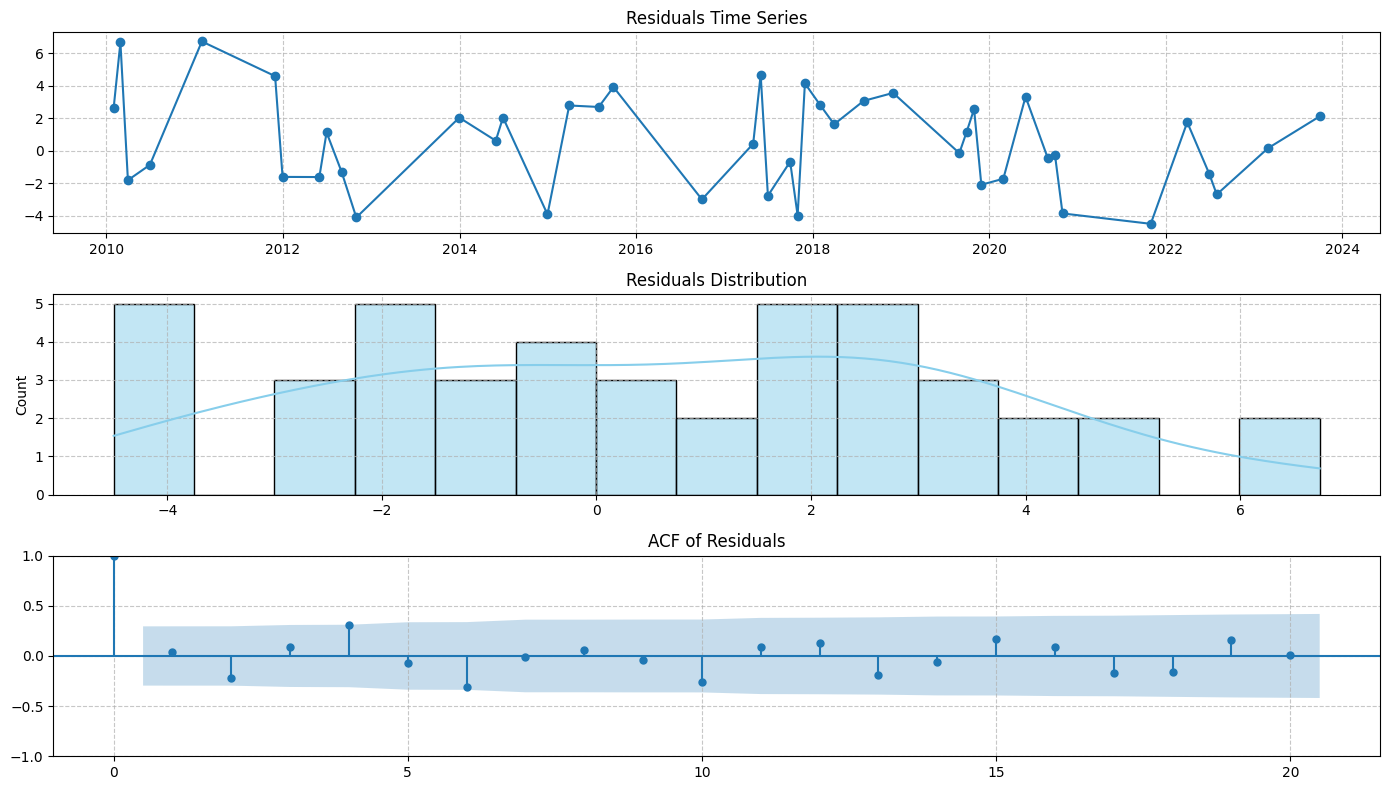

Ljung-Box p-value: 0.0681
✅ Phần dư KHÔNG có tự tương quan (White Noise)
AIC của mô hình: 219.4698


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

def evaluate_arima_model_v2(series, arima_order):
    model = ARIMA(series, order=arima_order).fit()
    residuals = model.resid

    # Vẽ biểu đồ phần dư đẹp hơn
    plt.figure(figsize=(14, 8))

    # Residuals Time Series Plot
    plt.subplot(3, 1, 1)
    plt.plot(residuals, marker='o', linestyle='-')
    plt.title('Residuals Time Series')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Residuals Histogram with KDE
    plt.subplot(3, 1, 2)
    sns.histplot(residuals, kde=True, color='skyblue', bins=15)
    plt.title('Residuals Distribution')
    plt.grid(True, linestyle='--', alpha=0.7)

    # ACF Plot
    plt.subplot(3, 1, 3)
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title('ACF of Residuals')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Ljung-Box Test
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    lb_pvalue = lb_test["lb_pvalue"].values[0]

    print(f"Ljung-Box p-value: {lb_pvalue:.4f}")
    if lb_pvalue > 0.05:
        print("✅ Phần dư KHÔNG có tự tương quan (White Noise)")
    else:
        print("⚠️ Phần dư CÓ tự tương quan (Cần xem xét lại mô hình)")

    print(f"AIC của mô hình: {model.aic:.4f}")

# Chạy ví dụ cho một quốc gia
quoc_gia = "USA"  # Thay đổi nếu cần
data_country = df_unemployment[df_unemployment["Country"] == quoc_gia]
series = data_country.set_index("Date")["Unemployment Rate (%)"].dropna()
thong_so_arima = (1, 1, 1)  # Thay đổi theo kết quả ARIMA của bạn

evaluate_arima_model_v2(series, thong_so_arima)
